# How to Handle Categorical Variables
 
1.Frequent Categories imputation

In [5]:
import pandas as pd
df=pd.read_csv('train_h.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [6]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [7]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [10]:
# Percentage of missing values
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

# Compute the frequency for every feature

<AxesSubplot:>

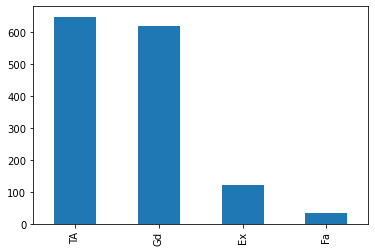

In [16]:
df['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

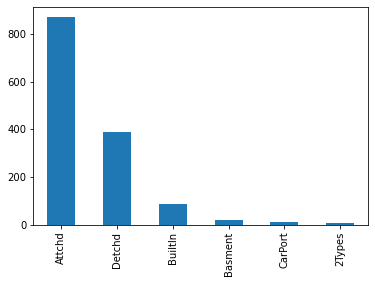

In [18]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

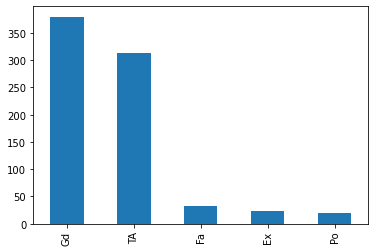

In [20]:
df['FireplaceQu'].value_counts().plot.bar()

In [22]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [29]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [30]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [31]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [32]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

Advantages:
    
1.Easy to implement

DisAdvantages:-

1.Since we are using more frequent label,it may use in a over-represent way if there are many nan.

2.It distort the relationship of the most frequent label

In [76]:
# Capturing NAN with a new feature
df=pd.read_csv('train_h.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [77]:
### Adding A Variable with the new feature to capture NAN
variables=['BsmtQual','FireplaceQu','GarageType']

In [79]:
import numpy as np
for features in df[variables]:
    df[features+'_var']=np.where(df[features].isnull(),1,0)

In [80]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,NaN,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0
5,Gd,NaN,Attchd,143000,0,1,0
6,Ex,Gd,Attchd,307000,0,0,0
7,Gd,TA,Attchd,200000,0,0,0
8,TA,TA,Detchd,129900,0,0,0
9,TA,TA,Attchd,118000,0,0,0


In [81]:
frequent=df['BsmtQual'].mode()[0]

In [82]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [83]:
df['BsmtQual'].head(20)

0     Gd
1     Gd
2     Gd
3     TA
4     Gd
5     Gd
6     Ex
7     Gd
8     TA
9     TA
10    TA
11    Ex
12    TA
13    Gd
14    TA
15    TA
16    TA
17    TA
18    TA
19    TA
Name: BsmtQual, dtype: object

In [84]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,NaN,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [88]:
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


### Suppose if we have more frequent categories,we will replace it with new feature

In [89]:
df=pd.read_csv('train_h.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [90]:
def impute_nan(df,variable):
    df[variable]=np.where(df[variable].isnull(),'Missing',df[variable])

In [92]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

from this imputation we have a new category as Missing

Replacing All the NAN with a new categories

In [97]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


##ONE-HOT ENCODING

In [100]:
df=pd.read_csv('titanic.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [102]:
###Performing one-hot encoding
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [104]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [105]:
#Checking unique feature
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [106]:
df.dropna(inplace=True)

In [108]:
# drop_first=True is used to avoid Dummy Variable Trap
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


##ONE-HOT ENCODING WITH MANY CATEGORICAL IN A Feature

In [111]:
df=pd.read_csv('train.csv',usecols=['X0','X1','X2','X3','X4','X5'])

In [115]:
df.head()

,X0,X1,X2,X3,X4,X5
0,k,v,at,a,d,u
1,k,t,av,e,d,y
2,az,w,n,c,d,x
3,az,t,n,f,d,x
4,az,v,n,f,d,h


In [117]:
df['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
g       1
ab      1
ac      1
Name: X0, dtype: int64

In [120]:
for i in df.columns:
    print(len(df[i].unique()),'labels')

47 labels
27 labels
44 labels
7 labels
4 labels
29 labels


In [122]:
df['X1'].value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [125]:
lst_10=df['X1'].value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [128]:
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [129]:
df.head()

,X0,X1,X2,X3,X4,X5,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,0,0,0,0,1,0,0,0,0,0


In [130]:
lst_10.append('X1')

In [132]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


# ORDINAL NO ENCODING

In [162]:
import datetime

In [163]:
today_date=datetime.datetime.today()
today_date

datetime.datetime(2020, 10, 14, 19, 40, 44, 465989)

In [164]:
today_date-datetime.timedelta(2)

datetime.datetime(2020, 10, 12, 19, 40, 44, 465989)

In [165]:
# List Comprehension
day=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [176]:
data=pd.DataFrame(day)
data.columns=['Day']

In [177]:
data

,Day
0,2020-10-14 19:40:44.465989
1,2020-10-13 19:40:44.465989
2,2020-10-12 19:40:44.465989
3,2020-10-11 19:40:44.465989
4,2020-10-10 19:40:44.465989
5,2020-10-09 19:40:44.465989
6,2020-10-08 19:40:44.465989
7,2020-10-07 19:40:44.465989
8,2020-10-06 19:40:44.465989
9,2020-10-05 19:40:44.465989


In [181]:
data['Weekday']=data['Day'].dt.strftime("%A")

In [182]:
data.head()

,Day,Weekday
0,2020-10-14 19:40:44.465989,Wednesday
1,2020-10-13 19:40:44.465989,Tuesday
2,2020-10-12 19:40:44.465989,Monday
3,2020-10-11 19:40:44.465989,Sunday
4,2020-10-10 19:40:44.465989,Saturday


In [186]:
dict={'Monday':1,'Tuesday':2,'Wednesday':3, 'Thursday':4 ,'Friday':5 , 'Saturday':6 ,'Sunday':7}
dict

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [187]:
data['Weekday'].map(dict)

0     3
1     2
2     1
3     7
4     6
5     5
6     4
7     3
8     2
9     1
10    7
11    6
12    5
13    4
14    3
Name: Weekday, dtype: int64

In [188]:
data['Weekday_ordinal']=data['Weekday'].map(dict)

In [189]:
data.head()

,Day,Weekday,Weekday_ordinal
0,2020-10-14 19:40:44.465989,Wednesday,3
1,2020-10-13 19:40:44.465989,Tuesday,2
2,2020-10-12 19:40:44.465989,Monday,1
3,2020-10-11 19:40:44.465989,Sunday,7
4,2020-10-10 19:40:44.465989,Saturday,6


# Count/Frequency Encoding

In [195]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None,index_col=None) 
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [196]:
train_set[1].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [199]:
columns=[1,3,5,6,7,8,9,13]

In [202]:
train_set=train_set[columns]

In [203]:
train_set.columns=['Employment','Degree','Status','Designation','Family_Job','Race','Sex','Country']

In [204]:
train_set.head()

,Employment,Degree,Status,Designation,Family_Job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [206]:
for feature in train_set[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
Family_Job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [209]:
country_map=train_set['Country'].value_counts().to_dict()

In [210]:
train_set['Country']=train_set['Country'].map(country_map)

<ipython-input-210-702212cebb55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Country']=train_set['Country'].map(country_map)


In [211]:
train_set.head()

,Employment,Degree,Status,Designation,Family_Job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


Advantages:-

1. Easy to implement

2. Not increasing feature space

DisAdvantages:

1.It will try to provide same weights if the frequency are same

# TARGET GUIDED ORDINAL ENCODING

1.Ordering the labels according to the target

2.Replacing the labels by the joint probability of being 1 or 0

In [212]:
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [213]:
df['Cabin'].fillna('Missing',inplace=True)

In [214]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [215]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [216]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [219]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [220]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [224]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [225]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [226]:
df['Cabin_ordinal']=df['Cabin'].map(ordinal_labels2)

In [227]:
df.head()

,Survived,Cabin,Cabin_ordinal
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


### Mean Encoding

In [230]:
mean_labels=df.groupby(['Cabin'])['Survived'].mean().to_dict()
mean_labels

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [231]:
df['mean_ordinal']=df['Cabin'].map(mean_labels)

In [232]:
df.head()

,Survived,Cabin,Cabin_ordinal,mean_ordinal
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


# Probability-Ratio Encoding

1.Probability of Survived based on Cabin

2.Probability of Not Survived

3.Divide Survived and Died

4.Now  we get Probability Ratio 

5.Map prob_ratio to dataframe

In [233]:
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN
...,...,...
886,0,NaN
887,1,B42
888,0,NaN
889,1,C148


In [235]:
# Replacng NAN
df['Cabin'].fillna('Missing',inplace=True)
df

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
...,...,...
886,0,Missing
887,1,B42
888,0,Missing
889,1,C148


In [236]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [238]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [239]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [243]:
#Performing Probability Ratio Encoding
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [244]:
prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [246]:
prob_df['Died']=1-prob_df['Survived']
prob_df

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [248]:
prob_df['Prob_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Prob_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [250]:
probability_encoded=prob_df['Prob_ratio'].to_dict()

In [251]:
# Map the value to DataFrame
df['Cabin_encoded']=df['Cabin'].map(probability_encoded)
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
